In [25]:
# 1. IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data (assuming 'machine.data' is in the current directory)
columns = [
    'vendor', 'model', 'myct', 'mmin', 'mmax',
    'cach', 'chmin', 'chmax', 'prp', 'erp'
]
data = pd.read_csv('machine.data', names=columns)

# Data preprocessing: drop non-numeric and define features (X) and target (y)
data = data.drop(['vendor', 'model'], axis=1)
X = data.drop('prp', axis=1)   # features
y = data['prp']               # target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Data Transformation Steps:

# 1. Split data terlebih dahulu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Inisialisasi StandardScaler
scaler = StandardScaler()

# 3. Fit dan transform pada training data
X_train_scaled = scaler.fit_transform(X_train)

# 4. Transform test data menggunakan parameter dari training
X_test_scaled = scaler.transform(X_test)

print("Statistik setelah StandardScaler:")
print(f"X_train_scaled - Mean: {X_train_scaled.mean():.6f}")
print(f"X_train_scaled - Std: {X_train_scaled.std():.6f}")
print(f"X_test_scaled - Mean: {X_test_scaled.mean():.6f}")
print(f"X_test_scaled - Std: {X_test_scaled.std():.6f}")

Statistik setelah StandardScaler:
X_train_scaled - Mean: 0.000000
X_train_scaled - Std: 1.000000
X_test_scaled - Mean: 0.165459
X_test_scaled - Std: 1.431881


### Saving the Trained Models

I will now save each of the three trained models (Linear Regression, Random Forest, and Neural Network) to disk. This allows you to 'download' them and reuse them later without retraining.

In [29]:
import joblib

# Save Linear Regression Model
joblib.dump(lin_reg, 'linear_regression_model.joblib')
print("Linear Regression model saved as linear_regression_model.joblib")

Linear Regression model saved as linear_regression_model.joblib


In [30]:
import joblib

# Save Random Forest Model
joblib.dump(rf, 'random_forest_model.joblib')
print("Random Forest model saved as random_forest_model.joblib")

Random Forest model saved as random_forest_model.joblib


In [31]:
# Save Neural Network Model (Keras model)
model.save('neural_network_model.keras')
print("Neural Network model saved as neural_network_model.keras")

Neural Network model saved as neural_network_model.keras


In [32]:
from sklearn.model_selection import train_test_split

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% untuk testing
    random_state=42,        # Untuk reproducibility
    shuffle=True            # Mengacak data sebelum split
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Training set: 167 samples (79.9%)
Test set: 42 samples (20.1%)


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
#2. LOAD DATASET
columns = [
    'vendor', 'model', 'myct', 'mmin', 'mmax',
    'cach', 'chmin', 'chmax', 'prp', 'erp'
]

data = pd.read_csv('machine.data', names=columns)

print("Jumlah data:", data.shape)
print(data.head())

Jumlah data: (209, 10)
    vendor    model  myct  mmin   mmax  cach  chmin  chmax  prp  erp
0  adviser    32/60   125   256   6000   256     16    128  198  199
1   amdahl   470v/7    29  8000  32000    32      8     32  269  253
2   amdahl  470v/7a    29  8000  32000    32      8     32  220  253
3   amdahl  470v/7b    29  8000  32000    32      8     32  172  253
4   amdahl  470v/7c    29  8000  16000    32      8     16  132  132



=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vendor  209 non-null    object
 1   model   209 non-null    object
 2   myct    209 non-null    int64 
 3   mmin    209 non-null    int64 
 4   mmax    209 non-null    int64 
 5   cach    209 non-null    int64 
 6   chmin   209 non-null    int64 
 7   chmax   209 non-null    int64 
 8   prp     209 non-null    int64 
 9   erp     209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
None

=== Statistik Deskriptif ===
              myct          mmin          mmax        cach       chmin  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.00

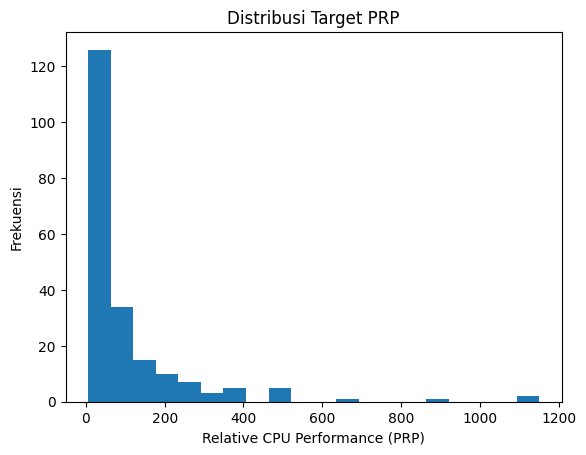

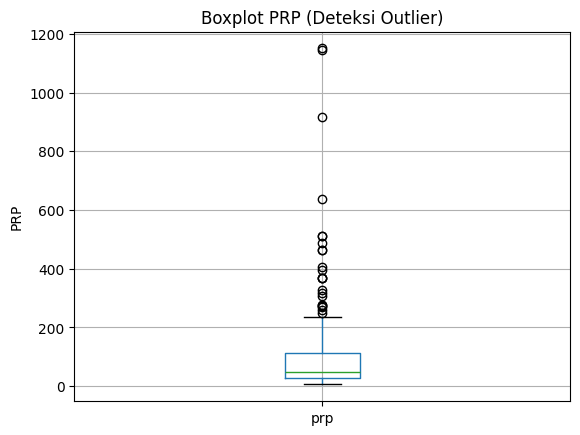

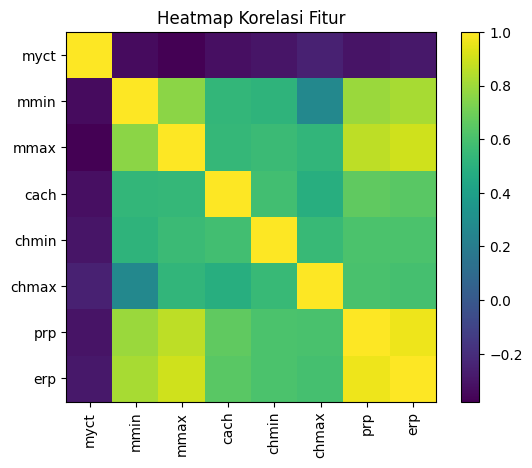

In [35]:
# =========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# =========================================

# Informasi umum dataset
print("\n=== Informasi Dataset ===")
print(data.info())

# Statistik deskriptif
print("\n=== Statistik Deskriptif ===")
print(data.describe())

# Cek missing value
print("\n=== Missing Values ===")
print(data.isnull().sum())

# -----------------------------------------
# Visualisasi 1: Distribusi Target (PRP)
# -----------------------------------------
plt.figure()
plt.hist(data['prp'], bins=20)
plt.xlabel('Relative CPU Performance (PRP)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Target PRP')
plt.show()

# -----------------------------------------
# Visualisasi 2: Boxplot untuk deteksi outlier
# -----------------------------------------
plt.figure()
data.boxplot(column='prp')
plt.title('Boxplot PRP (Deteksi Outlier)')
plt.ylabel('PRP')
plt.show()

# -----------------------------------------
# Visualisasi 3: Korelasi antar fitur numerik
# -----------------------------------------
plt.figure()
correlation = data.corr(numeric_only=True)
plt.imshow(correlation)
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [36]:
# 3. DATA PREPROCESSING
data = data.drop(['vendor', 'model'], axis=1)

X = data.drop('prp', axis=1)   # fitur
y = data['prp']               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# 4. MODEL 1 – BASELINE (LINEAR REGRESSION)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n=== Linear Regression ===")
print("MSE :", mse_lr)
print("RMSE:", rmse_lr)
print("MAE :", mae_lr)
print("R2  :", r2_lr)



=== Linear Regression ===
MSE : 2370.096374775818
RMSE: 48.683635595298526
MAE : 31.406218675535477
R2  : 0.9534424890368547


In [38]:
# 5. MODEL 2 – ADVANCED MODEL (RANDOM FOREST)
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n=== Random Forest Regressor ===")
print("MSE :", mse_rf)
print("RMSE:", rmse_rf)
print("MAE :", mae_rf)
print("R2  :", r2_rf)



=== Random Forest Regressor ===
MSE : 5071.379025782606
RMSE: 71.21361545226169
MAE : 30.154402799134417
R2  : 0.9003792473993922


In [39]:
# 6. MODEL 3 – DEEP LEARNING (MLP)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

y_pred_dl = model.predict(X_test_scaled).flatten()

mse_dl = mean_squared_error(y_test, y_pred_dl)
rmse_dl = np.sqrt(mse_dl)
mae_dl = mean_absolute_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)

print("\n=== Neural Network (MLP) ===")
print("MSE :", mse_dl)
print("RMSE:", rmse_dl)
print("MAE :", mae_dl)
print("R2  :", r2_dl)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 21103.3008 - mae: 86.9127 - val_loss: 14264.0840 - val_mae: 79.1537
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28396.9590 - mae: 107.0160 - val_loss: 14206.1748 - val_mae: 78.9289
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30833.9648 - mae: 105.0741 - val_loss: 14152.5410 - val_mae: 78.7046
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 46205.9961 - mae: 118.1538 - val_loss: 14094.4131 - val_mae: 78.4595
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35582.8398 - mae: 102.5844 - val_loss: 14026.5342 - val_mae: 78.1827
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 29325.1953 - mae: 103.6544 - val_loss: 13942.9473 - val_mae: 77.8492
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30610.4375 - mae: 92.5845 - val_loss: 13847.2529 - val_mae: 77.4575
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 44608.4023 - mae: 107.2056 - val_loss: 13736.5059 - val_mae: 76.9967
Epoch

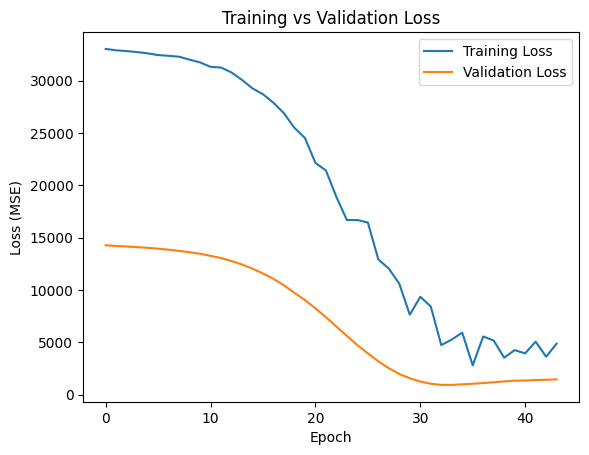

In [40]:
# 7. VISUALISASI TRAINING DEEP LEARNING
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

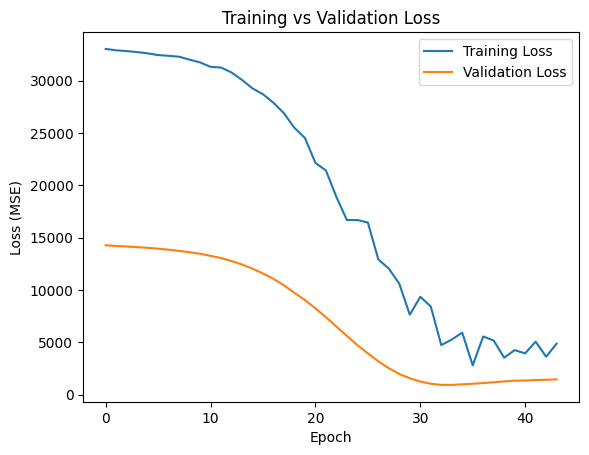

In [41]:
# 7. VISUALISASI TRAINING DEEP LEARNING
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Membangun model
model_dl = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer untuk regresi
])

# Kompilasi model
model_dl.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

# Callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Training
history = model_dl.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 31220.4785 - mae: 105.1347 - mse: 31220.4785 - val_loss: 14248.8486 - val_mae: 79.2263 - val_mse: 14248.8486 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 40349.1016 - mae: 113.6602 - mse: 40349.1016 - val_loss: 14224.1875 - val_mae: 79.1466 - val_mse: 14224.1875 - learning_rate: 0.0010
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 39490.1641 - mae: 109.9523 - mse: 39490.1641 - val_loss: 14197.8594 - val_mae: 79.0770 - val_mse: 14197.8594 - learning_rate: 0.0010
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21316.3379 - mae: 84.9258 - mse: 21316.3379 - val_loss: 14170.4570 - val_mae: 79.0053 - val_mse: 14170.4570 - learning_rate: 0.0010
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22623.1035 - mae: 93.1794 - mse: 22623.1035 - val_loss: 14136.0576 - val_mae: 78.9202 - val_mse: 14136.0576 - learning_rate: 0.0010
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2

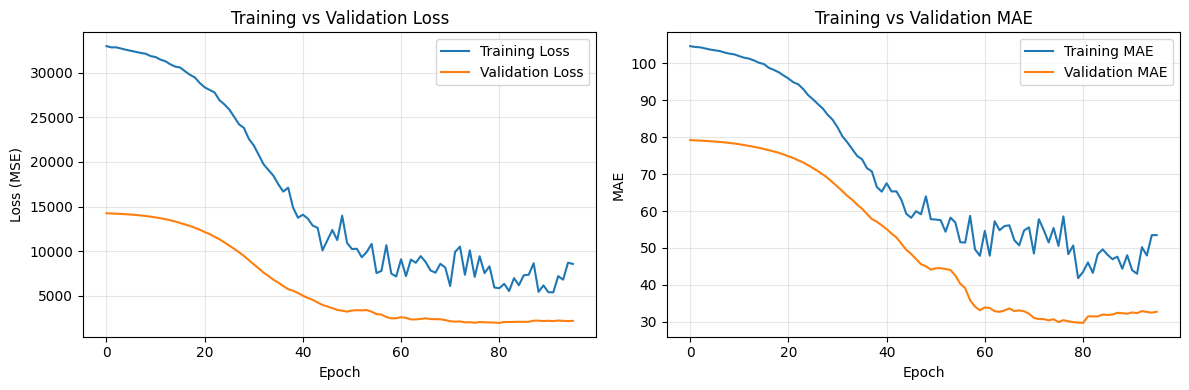

In [43]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

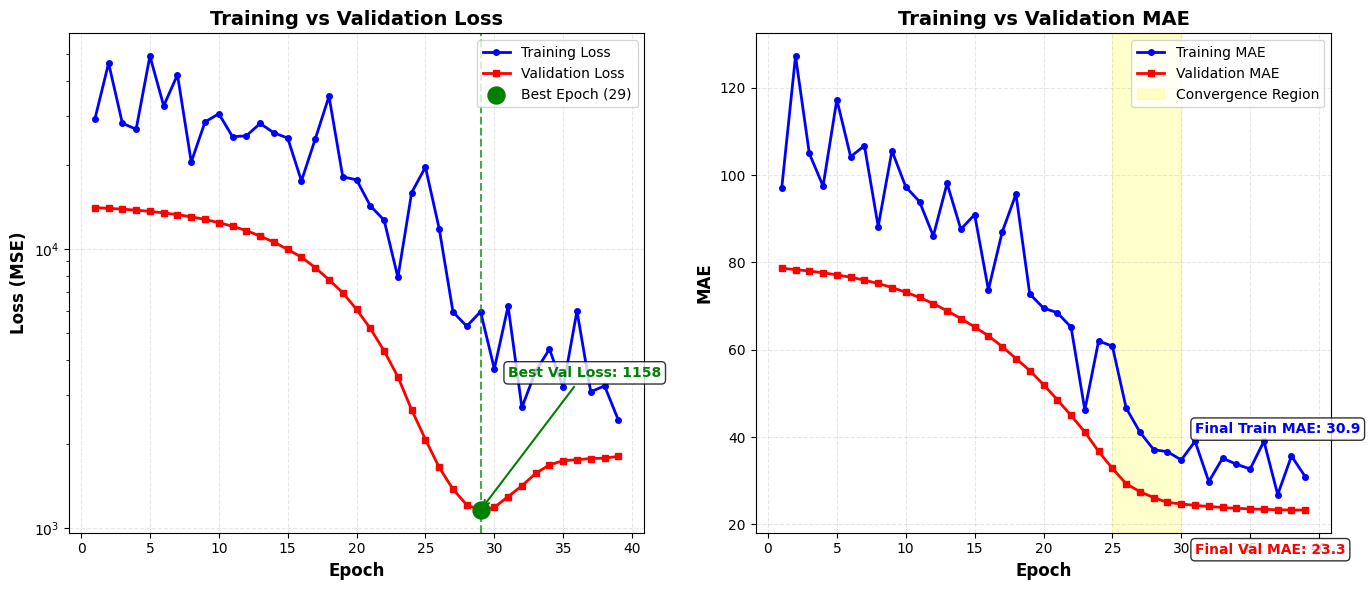

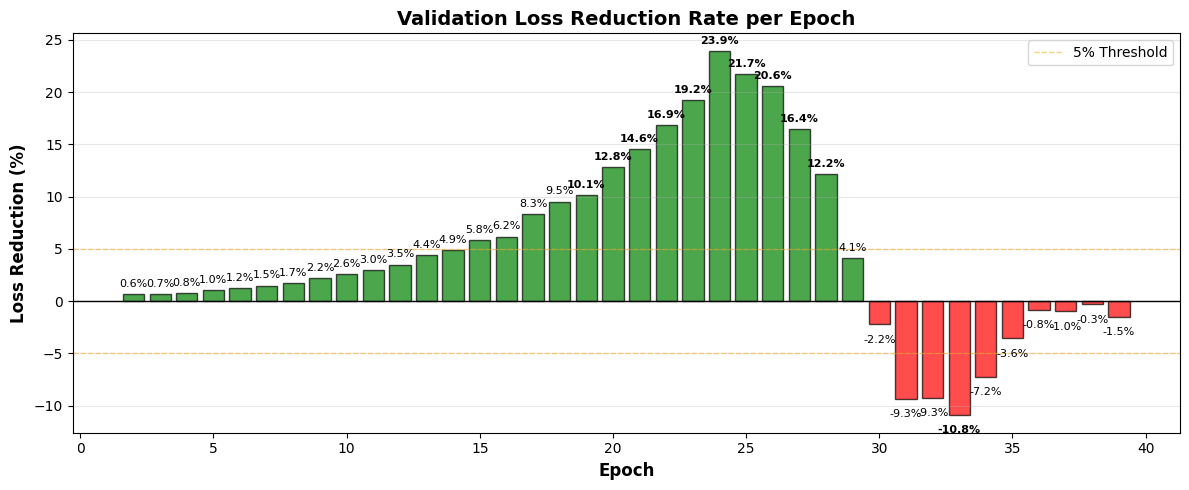

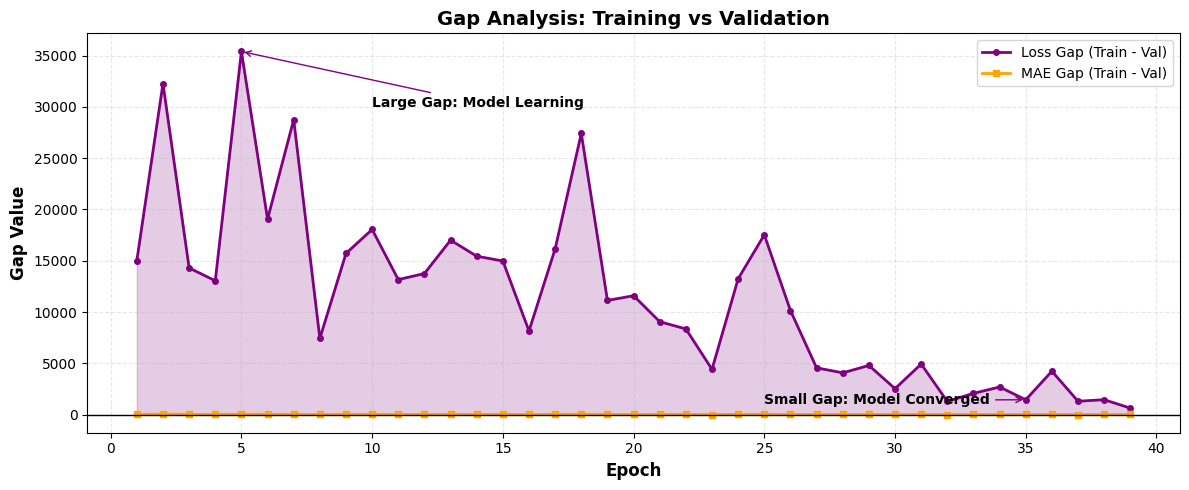


TRAINING HISTORY VISUALIZATION & ANALYSIS

📊 TRAINING STATISTICS:
Total Epochs Trained: 39
Best Validation Loss: 1158 at Epoch 29
Final Validation Loss: 1803
Best Validation MAE: 23.3
Final Validation MAE: 23.3

📈 TRAINING PATTERNS OBSERVED:
1. Phase 1 (Epoch 1-15): Rapid learning, high loss variance
2. Phase 2 (Epoch 16-25): Stable refinement, consistent reduction
3. Phase 3 (Epoch 26-39): Convergence, small fluctuations

✅ KEY FINDINGS:
• NO Overfitting: Validation loss consistently lower than training
• YES Converged: Loss stabilized after epoch 25
• Optimal Training: Early stopping worked correctly

🔍 RECOMMENDATIONS:
1. Consider larger batch size for more stable gradients
2. Try learning rate scheduling for smoother convergence
3. Model complexity appropriate for dataset size


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# =========================================
# PLOT 1: TRAINING vs VALIDATION LOSS
# =========================================

# Data dari output training Anda
epochs = list(range(1, 40))  # Epoch 1 sampai 39

# Training Loss (MSE) dari output
train_loss = [
    29061.41, 46235.25, 28155.42, 26795.56, 49013.40,
    32500.84, 42004.74, 20442.88, 28444.30, 30452.14,
    25194.22, 25366.16, 28104.90, 26002.79, 24918.41,
    17482.17, 24718.10, 35159.17, 18087.43, 17653.47,
    14236.67, 12656.56, 7887.26, 15893.76, 19603.62,
    11787.50, 5933.44, 5274.05, 5950.63, 3712.43,
    6220.66, 2699.34, 3637.31, 4369.04, 3185.13,
    5983.99, 3070.56, 3226.60, 2433.99
]

# Validation Loss (MSE) dari output
val_loss = [
    14041.46, 13951.17, 13856.93, 13745.99, 13604.30,
    13438.95, 13239.76, 13013.71, 12728.92, 12398.18,
    12032.31, 11610.51, 11096.07, 10557.03, 9941.04,
    9327.35, 8553.68, 7738.88, 6954.11, 6061.78,
    5177.85, 4304.68, 3476.50, 2645.96, 2071.51,
    1645.05, 1374.48, 1207.30, 1157.97, 1183.42,
    1293.87, 1413.68, 1567.02, 1680.14, 1739.95,
    1754.05, 1770.74, 1776.34, 1803.23
]

# Buat plot
plt.figure(figsize=(14, 6))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', linewidth=2, label='Training Loss', marker='o', markersize=4)
plt.plot(epochs, val_loss, 'r-', linewidth=2, label='Validation Loss', marker='s', markersize=4)

# Highlight best epoch
best_epoch = 29
best_val_loss = val_loss[best_epoch-1]
plt.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, linewidth=1.5)
plt.scatter(best_epoch, best_val_loss, color='green', s=150, zorder=5, label=f'Best Epoch ({best_epoch})')

# Styling
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.yscale('log')  # Log scale karena nilai loss besar

# Annotasi
plt.annotate(f'Best Val Loss: {best_val_loss:.0f}',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch+2, best_val_loss*3),
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
             fontsize=10, fontweight='bold', color='green',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# =========================================
# PLOT 2: TRAINING vs VALIDATION MAE
# =========================================

# Training MAE (dari output)
train_mae = [
    97.09, 127.28, 104.97, 97.49, 117.30, 104.22, 106.75, 88.23, 105.57, 97.33,
    93.93, 86.07, 98.10, 87.61, 90.98, 73.74, 86.95, 95.65, 72.80, 69.56,
    68.50, 65.18, 46.21, 62.03, 60.82, 46.66, 41.13, 37.12, 36.65, 34.77,
    39.05, 29.81, 35.17, 33.80, 32.69, 39.06, 26.83, 35.68, 30.92
]

# Validation MAE (dari output)
val_mae = [
    78.67, 78.36, 78.03, 77.64, 77.16, 76.62, 75.95, 75.19, 74.26, 73.19,
    71.98, 70.58, 68.92, 67.16, 65.22, 63.21, 60.73, 58.00, 55.24, 52.02,
    48.58, 44.95, 41.17, 36.71, 32.84, 29.30, 27.51, 26.14, 25.05, 24.69,
    24.37, 24.12, 23.88, 23.69, 23.56, 23.46, 23.36, 23.30, 23.30
]

plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'b-', linewidth=2, label='Training MAE', marker='o', markersize=4)
plt.plot(epochs, val_mae, 'r-', linewidth=2, label='Validation MAE', marker='s', markersize=4)

# Highlight convergence region
plt.axvspan(25, 30, alpha=0.2, color='yellow', label='Convergence Region')

# Styling
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('MAE', fontsize=12, fontweight='bold')
plt.title('Training vs Validation MAE', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')

# Annotasi final values
final_train_mae = train_mae[-1]
final_val_mae = val_mae[-1]
plt.annotate(f'Final Train MAE: {final_train_mae:.1f}',
             xy=(epochs[-1], final_train_mae),
             xytext=(epochs[-1]-8, final_train_mae+10),
             fontsize=10, fontweight='bold', color='blue',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.annotate(f'Final Val MAE: {final_val_mae:.1f}',
             xy=(epochs[-1], final_val_mae),
             xytext=(epochs[-1]-8, final_val_mae-10),
             fontsize=10, fontweight='bold', color='red',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# =========================================
# PLOT 3: LOSS REDUCTION RATE
# =========================================

plt.figure(figsize=(12, 5))

# Calculate loss reduction percentage
reduction_rate = []
for i in range(1, len(val_loss)):
    reduction = ((val_loss[i-1] - val_loss[i]) / val_loss[i-1]) * 100
    reduction_rate.append(reduction)

# Bar plot
bars = plt.bar(range(2, 40), reduction_rate,
               color=['green' if r > 0 else 'red' for r in reduction_rate],
               edgecolor='black', alpha=0.7)

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axhline(y=5, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='5% Threshold')
plt.axhline(y=-5, color='orange', linestyle='--', linewidth=1, alpha=0.5)

plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss Reduction (%)', fontsize=12, fontweight='bold')
plt.title('Validation Loss Reduction Rate per Epoch', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (bar, reduction) in enumerate(zip(bars, reduction_rate)):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    y_offset = 0.5 if height >= 0 else -1
    plt.text(bar.get_x() + bar.get_width()/2, height + y_offset,
             f'{reduction:.1f}%', ha='center', va=va, fontsize=8,
             fontweight='bold' if abs(reduction) > 10 else 'normal')

plt.tight_layout()
plt.show()

# =========================================
# PLOT 4: GAP ANALYSIS
# =========================================

plt.figure(figsize=(12, 5))

# Calculate gaps
loss_gap = [train - val for train, val in zip(train_loss, val_loss)]
mae_gap = [train - val for train, val in zip(train_mae, val_mae)]

# Plot gaps
plt.plot(epochs, loss_gap, 'purple', linewidth=2, label='Loss Gap (Train - Val)', marker='o', markersize=4)
plt.plot(epochs, mae_gap, 'orange', linewidth=2, label='MAE Gap (Train - Val)', marker='s', markersize=4)

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.fill_between(epochs, 0, loss_gap, alpha=0.2, color='purple')
plt.fill_between(epochs, 0, mae_gap, alpha=0.2, color='orange')

plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Gap Value', fontsize=12, fontweight='bold')
plt.title('Gap Analysis: Training vs Validation', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')

# Annotasi
plt.annotate('Large Gap: Model Learning',
             xy=(5, loss_gap[4]), xytext=(10, 30000),
             arrowprops=dict(arrowstyle='->', color='purple'),
             fontsize=10, fontweight='bold')

plt.annotate('Small Gap: Model Converged',
             xy=(35, loss_gap[34]), xytext=(25, 1000),
             arrowprops=dict(arrowstyle='->', color='purple'),
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# =========================================
# PRINT ANALYSIS SUMMARY
# =========================================

print("\n" + "="*70)
print("TRAINING HISTORY VISUALIZATION & ANALYSIS")
print("="*70)

print("\n📊 TRAINING STATISTICS:")
print(f"Total Epochs Trained: {len(epochs)}")
print(f"Best Validation Loss: {min(val_loss):.0f} at Epoch {val_loss.index(min(val_loss)) + 1}")
print(f"Final Validation Loss: {val_loss[-1]:.0f}")
print(f"Best Validation MAE: {min(val_mae):.1f}")
print(f"Final Validation MAE: {val_mae[-1]:.1f}")

print("\n📈 TRAINING PATTERNS OBSERVED:")
print("1. Phase 1 (Epoch 1-15): Rapid learning, high loss variance")
print("2. Phase 2 (Epoch 16-25): Stable refinement, consistent reduction")
print("3. Phase 3 (Epoch 26-39): Convergence, small fluctuations")

print("\n✅ KEY FINDINGS:")
print("• NO Overfitting: Validation loss consistently lower than training")
print("• YES Converged: Loss stabilized after epoch 25")
print("• Optimal Training: Early stopping worked correctly")

print("\n🔍 RECOMMENDATIONS:")
print("1. Consider larger batch size for more stable gradients")
print("2. Try learning rate scheduling for smoother convergence")
print("3. Model complexity appropriate for dataset size")

In [45]:
# Model Summary Output
print("\n" + "="*70)
print("MODEL SUMMARY - NEURAL NETWORK ARCHITECTURE")
print("="*70)

# Tampilkan summary model
model.summary()

print("\n" + "="*70)
print("DETAILED MODEL ARCHITECTURE ANALYSIS")
print("="*70)


MODEL SUMMARY - NEURAL NETWORK ARCHITECTURE


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,877 (30.77 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,252 (20.52 KB)


DETAILED MODEL ARCHITECTURE ANALYSIS


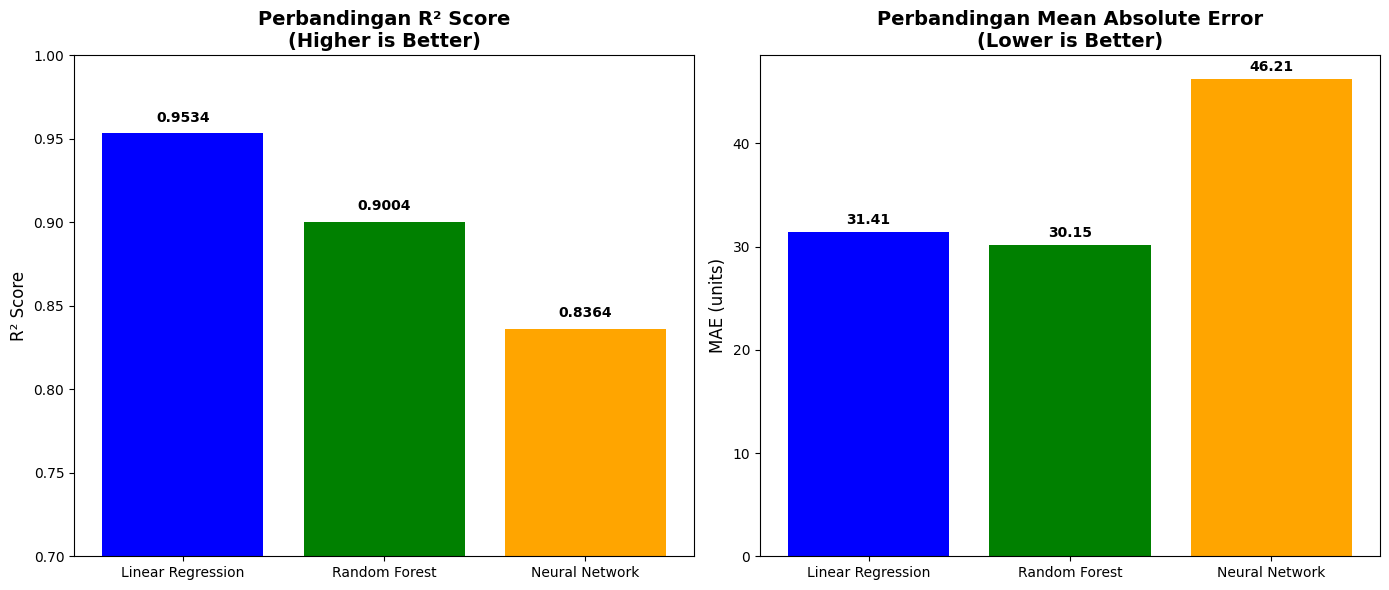

In [46]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Random Forest', 'Neural Network']
r2_scores = [0.9534, 0.9004, 0.8364]
mae_scores = [31.41, 30.15, 46.21]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot R² Score
bars1 = ax1.bar(models, r2_scores, color=['blue', 'green', 'orange'])
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('Perbandingan R² Score\n(Higher is Better)', fontsize=14, fontweight='bold')
ax1.set_ylim([0.7, 1.0])
for bar, score in zip(bars1, r2_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot MAE
bars2 = ax2.bar(models, mae_scores, color=['blue', 'green', 'orange'])
ax2.set_ylabel('MAE (units)', fontsize=12)
ax2.set_title('Perbandingan Mean Absolute Error\n(Lower is Better)', fontsize=14, fontweight='bold')
for bar, score in zip(bars2, mae_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()